# Clustering and PCA Analysis of Bee Eye Data

### Loading Libraries

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns

### Function to Load and Preprocess Data
Create a function that loads and preprocesses the data, such as setting indices and standardizing variables.

In [25]:
def load_and_preprocess_data(file_path, delimiter='\t', index_col='Species', cols_to_standardize=None):
    df = pd.read_csv(file_path, delimiter=delimiter)
    df.index = df[index_col]
    df = df.drop(columns=[index_col])
    if cols_to_standardize:
        scaler = StandardScaler()
        df_standardized = pd.DataFrame(scaler.fit_transform(df[cols_to_standardize]),
                                       columns=df.columns[:len(cols_to_standardize)],
                                       index=df.index)
        return df_standardized
    return df


### Function for Hierarchical Clustering and Dendrogram

This function encapsulates the logic of hierarchical clustering, distance calculation, and dendrogram generation.

In [26]:
def hierarchical_clustering(df, method='average', metric='euclidean', n_clusters=3, save_path=None):
    distances = pdist(df, metric=metric)
    Z = linkage(distances, method=method)
    plt.figure(figsize=(10, 7))
    dendrogram(Z, labels=df.index)
    if save_path:
        plt.savefig(save_path)
    plt.show()
    clusters = cut_tree(Z, n_clusters=n_clusters).flatten()
    return clusters


### Function to Calculate and Plot Silhouette Score

This will allow you to easily adjust the number of clusters and repeat the process at different points in the code.

In [27]:
def silhouette_scores(df, min_clusters=2, max_clusters=10):
    sil_scores = []
    for k in range(min_clusters, max_clusters):
        clusterer = AgglomerativeClustering(n_clusters=k, linkage='ward')
        cluster_labels = clusterer.fit_predict(df)
        sil_score = silhouette_score(df, cluster_labels)
        sil_scores.append(sil_score)
    plt.figure(figsize=(10, 6))
    plt.plot(range(min_clusters, max_clusters), sil_scores, marker='o')
    plt.title('Silhouette Scores for Various Numbers of Clusters')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()
    return sil_scores


### Function to Apply and Visualize K-Means Clustering

Group the K-Means logic and visualize the clusters.

In [28]:
def apply_kmeans_clustering(df, n_clusters, save_path=None):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df)
    df['Cluster'] = clusters
    sns.pairplot(df, hue='Cluster', palette='viridis')
    if save_path:
        plt.savefig(save_path)
    plt.show()
    return df, kmeans


### Data directory and path

In [29]:
root_directory = 'F:/open_git/bee_eyes'
data_path = f'{root_directory}/data/eyes_df.txt'
result_path = f'{root_directory}/results/'

### Load and preprocess data
##### Specify the columns to be standardized

In [32]:
columns_to_standardize = ['nf', 'vf', 'ff', 'df', 'co', 'ea', 'nfa']

##### Load and standardize the data

In [34]:
eyes_standardized = load_and_preprocess_data(data_path, cols_to_standardize=columns_to_standardize)

##### Check the standardized data

In [36]:
print(eyes_standardized.head())

               nf        vf        ff        df        co        ea       nfa
Species                                                                      
Maegis   0.124546  0.096756  0.700227  1.166070  0.743963  0.567677 -0.576887
Maegis  -0.156476  0.504054  0.614470  0.441760  0.761912  0.842958 -0.793627
Maegis   0.285665  0.663431  0.888894  1.186190  0.642847  0.632875 -0.551837
Maegis  -0.189262  0.326968  0.563016  0.321041  0.563439  0.328616 -0.575222
Maegis   0.126419  0.273842  0.683076  0.542358  0.464109  0.292395 -0.429321


## Perform Hierarchical Clustering

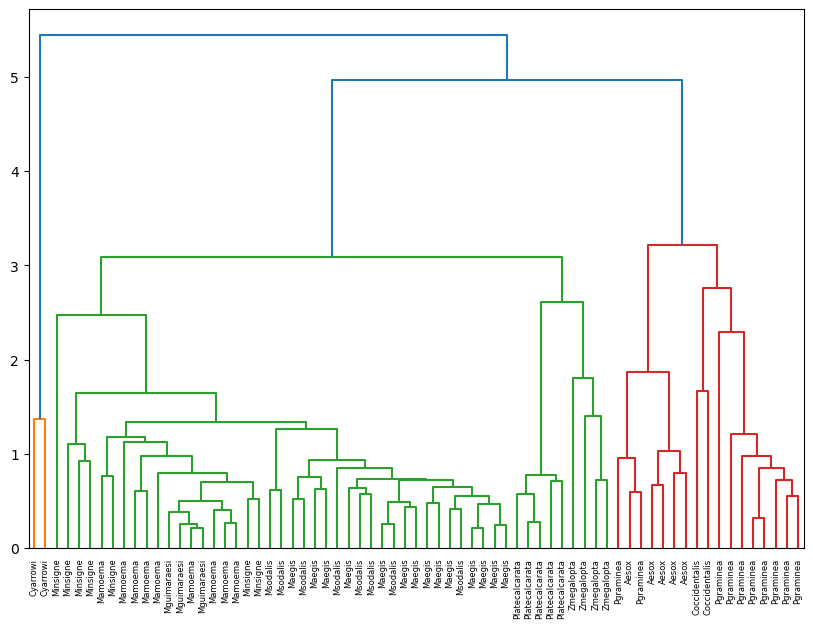

In [37]:
clusters = hierarchical_clustering(eyes_standardized, save_path=f'{result_path}/hierarchical_dendrogram.png')

## Calculate and Plot Silhouette Scores

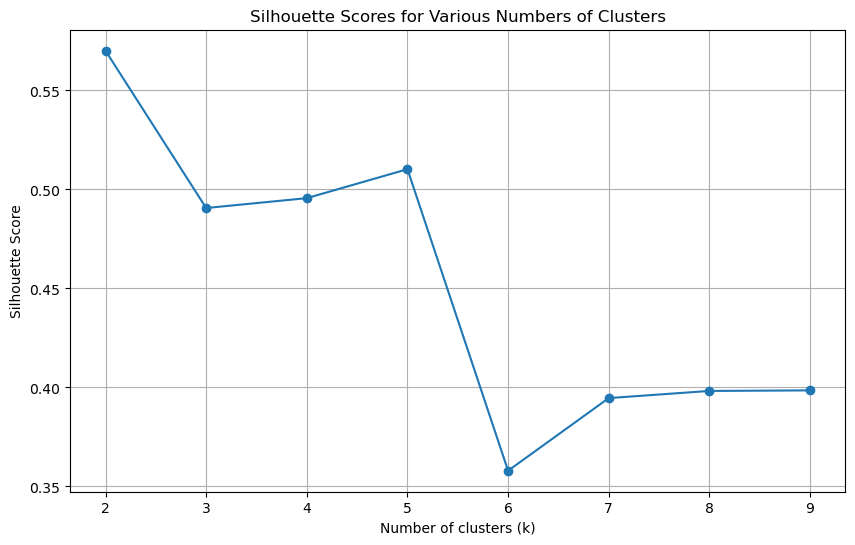

In [38]:
sil_scores = silhouette_scores(eyes_standardized)

## Apply K-Means and Visualize Results

F:\programas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


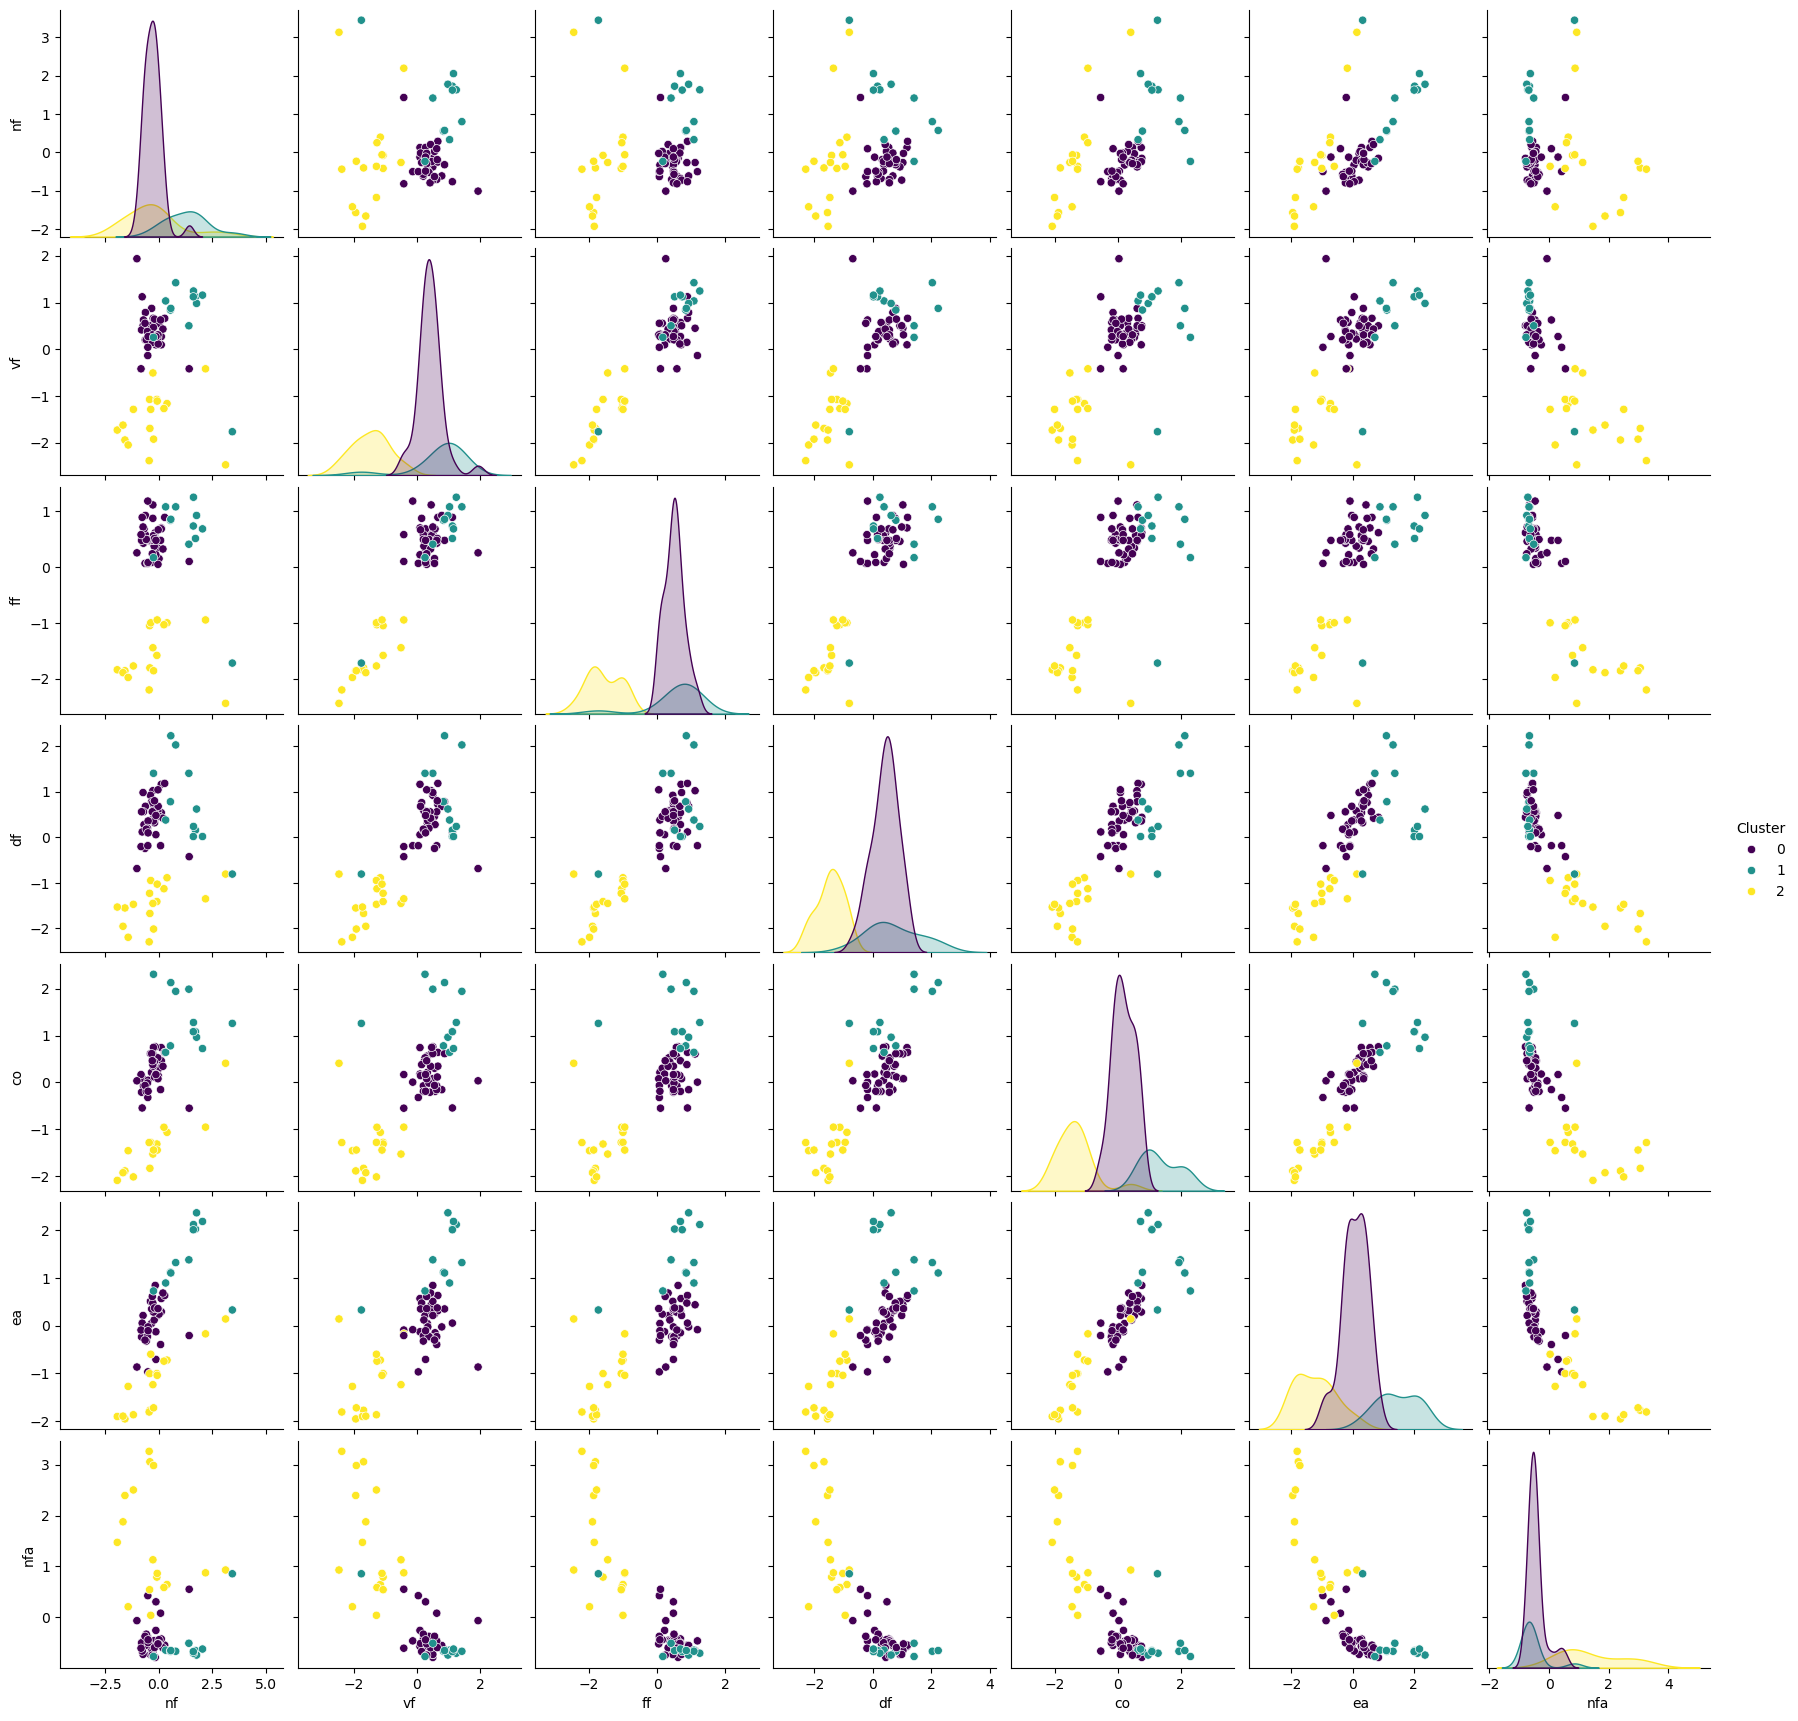

In [46]:
eyes_with_clusters, kmeans_model = apply_kmeans_clustering(eyes_standardized, n_clusters=3, save_path=f'{result_path}/eyes_kmeans_pairplot.png')

## Dimensionality Reduction with PCA

In [40]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(eyes_standardized)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans_model.labels_

## Plotting PCA with Clusters

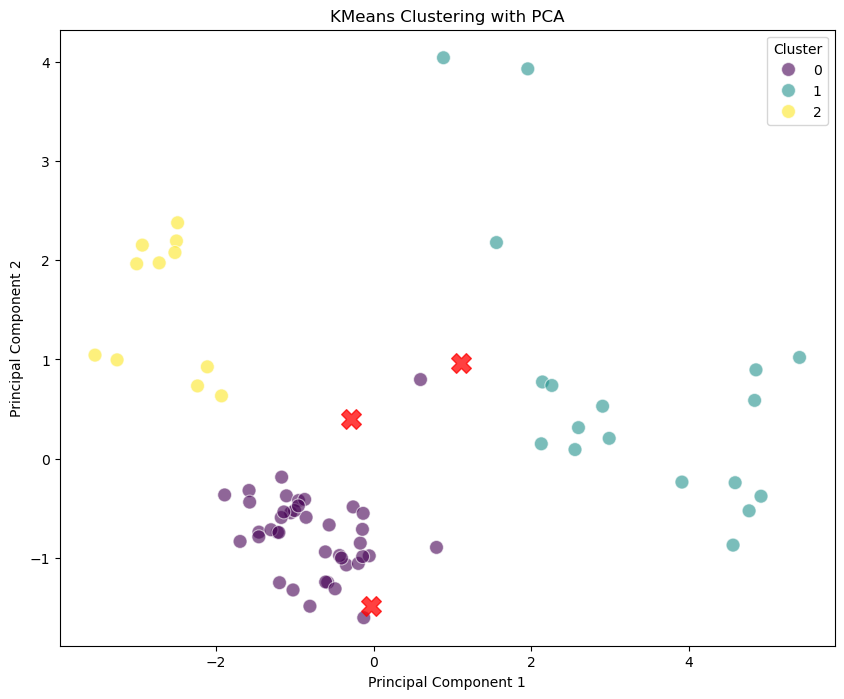

In [41]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.6)
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('KMeans Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig(f'{result_path}/eyes_kmeans.png')
plt.show()

### Saving cluster results

In [43]:
eyes_with_clusters.to_excel(f'{result_path}/cluster_kmeans_results.xlsx')